In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1259.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/659.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/274.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/315.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/919.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2037.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1819.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1938.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/948.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/123.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2939.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/959.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2824.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1724.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/s

In [2]:
import skimage.io as skio
imstack1=skio.imread("../input/weed-detection-in-soybean-crops/dataset/broadleaf/1.tif")
imstack1.shape

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


(187, 201, 3)

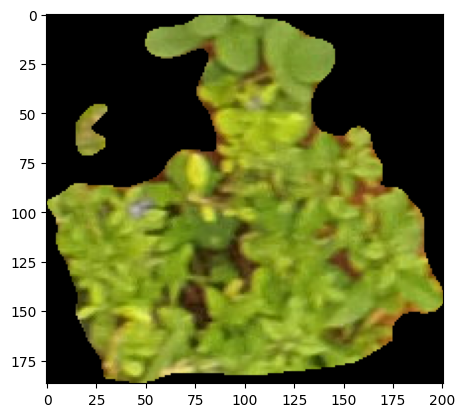

In [3]:
import matplotlib.pyplot as plt
import os
plt.imshow(imstack1)
plt.show()

In [4]:
os.listdir('../input/weed-detection-in-soybean-crops/dataset')

['soil', 'dataset', 'broadleaf', 'grass', 'soybean']

In [5]:
import matplotlib.pyplot as plt
from matplotlib import image
from PIL import Image

In [6]:
import numpy as np
import pandas as pd
import os
from matplotlib import image
from PIL import Image
def load_imgs(path):
    folders=os.listdir(path)
    data = []
    label = []
    folders.remove('dataset')
    for i in folders:
        images=os.listdir(path+'/'+i)
        for j in images:
            im=Image.open(path+'/'+i+'/'+j).convert('RGB')
            im=im.resize((200,200))
            ar=np.array(im)
            data.append(ar)
            label.append(i)
    t=pd.factorize(np.array(label))
    return np.array(data),label

In [7]:
x,y=load_imgs('../input/weed-detection-in-soybean-crops/dataset')
x.shape
#y.shape

(15336, 200, 200, 3)

In [8]:
target=pd.Series(y,dtype='category')
target

0           soil
1           soil
2           soil
3           soil
4           soil
          ...   
15331    soybean
15332    soybean
15333    soybean
15334    soybean
15335    soybean
Length: 15336, dtype: category
Categories (4, object): ['broadleaf', 'grass', 'soil', 'soybean']

In [9]:
t=target.cat.codes

In [10]:
dicti=dict(enumerate(target.cat.categories))
print(dicti)

{0: 'broadleaf', 1: 'grass', 2: 'soil', 3: 'soybean'}


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,t,test_size=0.2,random_state=100)
x_train.shape

(12268, 200, 200, 3)

In [12]:
img_size = (200, 200)
input_shape = (img_size[0], img_size[1], 3)

In [13]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Conv2D, Dense , UpSampling2D
from tensorflow.keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(20,kernel_size=5,activation='relu',input_shape=input_shape))
model_1.add(Conv2D(20,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(MaxPooling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Conv2D(10,kernel_size=5,activation='relu'))
model_1.add(Conv2D(4,kernel_size=5,activation='relu'))
model_1.add(UpSampling2D())
model_1.add(Flatten())
model_1.add(Dense(6,activation='softmax'))
model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 196, 196, 20)      1520      
                                                                 
 conv2d_1 (Conv2D)           (None, 192, 192, 20)      10020     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 96, 96, 20)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 10)        5010      
                                                                 
 conv2d_3 (Conv2D)           (None, 88, 88, 10)        2510      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 44, 44, 10)       0         
 2D)                                                    

In [14]:
model_1.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model_1.fit(x_train,y_train,epochs=11)

Epoch 1/11
384/384 [==============================] - 25s 35ms/step - loss: 0.6868 - accuracy: 0.7329
Epoch 2/11
384/384 [==============================] - 13s 34ms/step - loss: 0.4049 - accuracy: 0.8512
Epoch 3/11
384/384 [==============================] - 13s 35ms/step - loss: 0.6252 - accuracy: 0.7500
Epoch 4/11
384/384 [==============================] - 13s 34ms/step - loss: 0.4250 - accuracy: 0.8483
Epoch 5/11
384/384 [==============================] - 13s 35ms/step - loss: 0.3662 - accuracy: 0.8635
Epoch 6/11
384/384 [==============================] - 13s 34ms/step - loss: 0.3733 - accuracy: 0.8645
Epoch 7/11
384/384 [==============================] - 13s 34ms/step - loss: 0.3346 - accuracy: 0.8751
Epoch 8/11
384/384 [==============================] - 13s 34ms/step - loss: 0.3452 - accuracy: 0.8696
Epoch 9/11
384/384 [==============================] - 13s 34ms/step - loss: 0.3342 - accuracy: 0.8760
Epoch 10/11
384/384 [==============================] - 13s 35ms/step - loss: 0.340

In [16]:
y_pred=np.argmax(model_1.predict(x_test), axis=-1)
y_pred

96/96 [==============================] - 1s 13ms/step


array([2, 3, 3, ..., 2, 1, 3])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8754889178617992

In [18]:
model_1.evaluate(x_train,y_train)

384/384 [==============================] - 5s 13ms/step - loss: 0.3196 - accuracy: 0.8825


[0.3196234703063965, 0.8825399279594421]

In [19]:
model_1.evaluate(x_test,y_test)

96/96 [==============================] - 1s 13ms/step - loss: 0.3209 - accuracy: 0.8755


[0.3208545446395874, 0.8754889369010925]